# AIRLINE TWITTER SENTIMENT PROJECT

**Presented by:** (Samuel Mbugua Igecha, Pauline Ndung'u, Jimcollins Wamae, Winfred Muthoni, Susan Warigia, Eston Kamau)
***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Business Understanding

In the highly competitive airline industry, gaining a competitive advantage and ensuring customer satisfaction are critical for success. To achieve this, understanding customer sentiment and preferences is crucial. By leveraging sentiment analysis on Twitter data, specifically tweets related to airlines, airlines can gain valuable insights into customer feedback and opinions. This understanding allows them to shape strategies, enhance customer satisfaction, and maintain a positive reputation.

Analyzing customer sentiment expressed in tweets provides a comprehensive view of the general perception and public sentiment towards specific airlines. It enables airlines to identify areas of improvement, strengths, and weaknesses in their customer service offerings. By addressing customer concerns and enhancing satisfaction, airlines can foster loyalty and maintain a positive reputation in the highly competitive airline industry.


The importance of sentiment analysis in the airline industry is supported by research, such as the article by the International Air Transport Association  [IATA]('https://airlines.iata.org/2014/05/22/impact-reputation'). which emphasizes the impact of reputation on an airline's success. By conducting sentiment analysis on Twitter data, airlines can gain valuable insights, identify emerging trends, address negative sentiments, and proactively resolve customer issues, thus mitigating potential reputation risks.


### Objective

The objective of this project is to perform sentiment analysis on tweets related to different airlines and extract valuable insights to enhance customer experiences and maintain a positive reputation.


## 1.1 Specific Objectives

1. Determine the overall sentiment (positive, negative, or neutral) of tweets related to different airlines, providing insights into the general public sentiment towards specific airlines then coming up with solutions for improvement.
2. To use NLP techniques to preprocess and clean text data and prepare it for sentiment analysis.
3. To build multi-classification algorithms that will provide a more comprehensive sentiment analysis of the tweets.
4. To determine the models’ effectiveness in predicting the sentiment of airline passengers based on recall and F1-score metrics.

By achieving these objectives, airlines can gain valuable insights into customer preferences, opinions, and complaints. The analysis will facilitate data-driven decision-making, allowing airlines to improve customer service offerings, address concerns effectively, and build a positive reputation in the competitive airline industry.

The outcome of this project will empower airlines to make informed decisions, enhance customer satisfaction, foster loyalty, and gain a competitive edge by leveraging sentiment analysis to create personalized experiences and strengthen relationships with their customers.


# Data Understanding

Data containing 14640 rows and 20 columns has been obtained from [data.world]('https://data.world/crowdflower/airline-twitter-sentiment') which is more than sufficient and robust enough to be used for our analysis.Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service")

# Data Preparation

In [1]:
# Import relevant packages
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import re
import string
import json
import requests

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package punkt to C:\Users\JIM
[nltk_data]     WAMAE\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\JIM
[nltk_data]     WAMAE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\JIM
[nltk_data]     WAMAE\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [41]:
df = pd.read_csv('airline_sentiment_2_w_aa.csv',encoding='latin1')
df.head(15)

,unit_id,golden,unit_state,trusted_judgments,last_judgment_at,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,681448150,False,finalized,3,2015-02-25T05:24:00,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24T11:35:00,570306000000000000,NaN,Eastern Time (US & Canada)
1,681448153,False,finalized,3,2015-02-25T01:53:00,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24T11:15:00,570301000000000000,NaN,Pacific Time (US & Canada)
2,681448156,False,finalized,3,2015-02-25T10:01:00,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24T11:15:00,570301000000000000,Lets Play,Central Time (US & Canada)
3,681448158,False,finalized,3,2015-02-25T03:05:00,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24T11:15:00,570301000000000000,NaN,Pacific Time (US & Canada)
4,681448159,False,finalized,3,2015-02-25T05:50:00,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24T11:14:00,570301000000000000,NaN,Pacific Time (US & Canada)
5,681448162,False,finalized,3,2015-02-25T09:10:00,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24T11:14:00,570301000000000000,NaN,Pacific Time (US & Canada)
6,681448165,False,finalized,3,2015-02-25T08:11:00,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24T11:13:00,570301000000000000,San Francisco CA,Pacific Time (US & Canada)
7,681448167,False,finalized,3,2015-02-25T02:11:00,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24T11:12:00,570300000000000000,Los Angeles,Pacific Time (US & Canada)
8,681448169,False,finalized,3,2015-02-25T09:01:00,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn'tï¿½ï¿½_but NOW I ...",NaN,2015-02-24T11:11:00,570300000000000000,San Diego,Pacific Time (US & Canada)
9,681448171,False,finalized,3,2015-02-25T04:15:00,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24T10:53:00,570295000000000000,Los Angeles,Eastern Time (US & Canada)


### 1.1 Data Cleaning

In [42]:
df.shape

(14640, 20)

In [43]:
df.isnull().sum()

unit_id                             0
golden                              0
unit_state                          0
trusted_judgments                   0
last_judgment_at                   56
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_id                            0
tweet_location                   4733
user_timezone                    4820
dtype: int64

- For the negativereason column, we can't fill it with mode as that creates a mismatch with the airlinesentiment column. The negative reasons match with the negative sentiments. So we leave the column as it is, deleting the rows would lead to loss of important information and even affect model performance.

In [44]:
df.isnull().sum() / len(df) * 100

unit_id                          0.000000
golden                           0.000000
unit_state                       0.000000
trusted_judgments                0.000000
last_judgment_at                 0.382514
airline_sentiment                0.000000
airline_sentiment_confidence     0.000000
negativereason                  37.308743
negativereason_confidence       28.128415
airline                          0.000000
airline_sentiment_gold          99.726776
name                             0.000000
negativereason_gold             99.781421
retweet_count                    0.000000
text                             0.000000
tweet_coord                     93.039617
tweet_created                    0.000000
tweet_id                         0.000000
tweet_location                  32.329235
user_timezone                   32.923497
dtype: float64

airline_sentiment_gold and negativereason_gold have 99% missing data while tweet_coord has nearly 93% missing data. We will drop the columns. We will drop the rest of other columns later on after our EDA

In [45]:
columns_to_drop = ['airline_sentiment_gold', 'negativereason_gold', 'tweet_coord','tweet_location','user_timezone']
df = df.drop(columns_to_drop, axis=1)

In [46]:
df.head()

,unit_id,golden,unit_state,trusted_judgments,last_judgment_at,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_id
0,681448150,False,finalized,3,2015-02-25T05:24:00,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24T11:35:00,570306000000000000
1,681448153,False,finalized,3,2015-02-25T01:53:00,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24T11:15:00,570301000000000000
2,681448156,False,finalized,3,2015-02-25T10:01:00,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24T11:15:00,570301000000000000
3,681448158,False,finalized,3,2015-02-25T03:05:00,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24T11:15:00,570301000000000000
4,681448159,False,finalized,3,2015-02-25T05:50:00,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24T11:14:00,570301000000000000


In [47]:
df.duplicated().sum()

0

### 1.2 Exploratory Data Analysis

In [48]:
df.airline_sentiment.value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

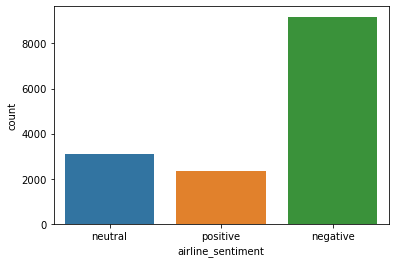

In [49]:
# Visualization of target variable/airline sentiment
ax = sns.countplot(x = "airline_sentiment", data = df)

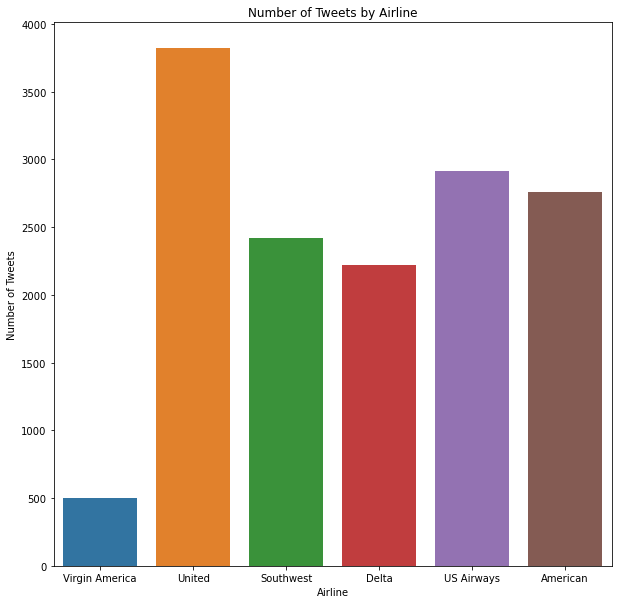

In [50]:
plt.figure(figsize = (10, 10))
ax = sns.countplot(x = "airline",data = df)
# Add labels and title
ax.set_xlabel("Airline")
ax.set_ylabel("Number of Tweets")
ax.set_title("Number of Tweets by Airline")

plt.show()

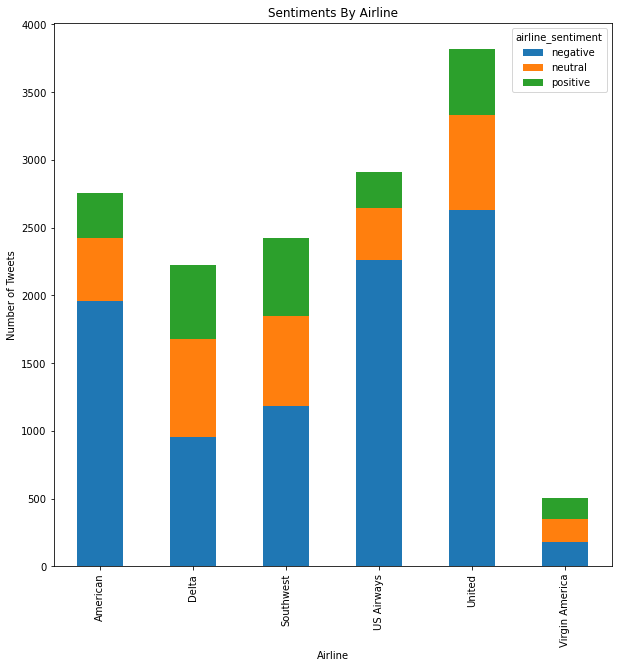

In [51]:
grouped_data = df.groupby(['airline', 'airline_sentiment']).size()
grouped_data.unstack().plot(kind='bar', stacked=True, figsize=(10,10))
plt.xlabel('Airline')
plt.ylabel('Number of Tweets')
plt.title("Sentiments By Airline")
plt.show()

- United Airline comes first based on the number of the negative, neutral and positive sentiments followed by US Airways then American Airlines. Virgin America comes last

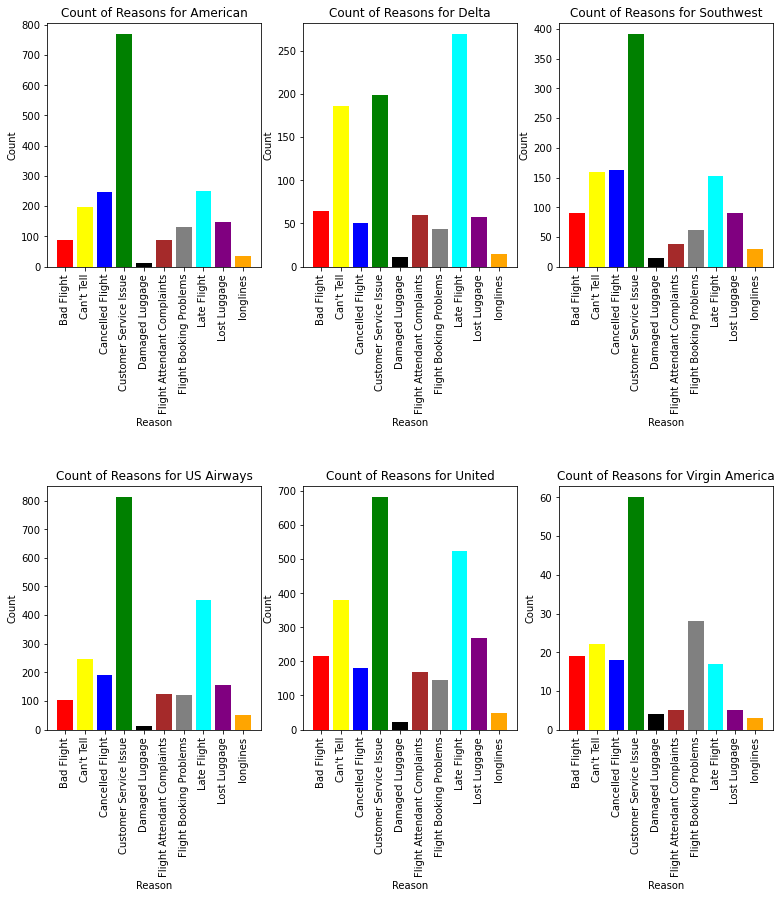

In [70]:
#Checking negative reasons for each airline
def NR_Count(Airline):
    if Airline == 'All':
        a = negative_data
    else:
        a = negative_data[negative_data['airline'] == Airline]
    count = a.groupby('negativereason')['count'].sum()
    return count

def plot_reason(Airline):
    count = NR_Count(Airline)
    Index = range(1, (len(count) + 1))
    plt.bar(Index, count, color=['red', 'yellow', 'blue', 'green', 'black', 'brown', 'gray', 'cyan', 'purple', 'orange'])
    plt.xticks(Index, count.index, rotation=90)
    plt.ylabel('Count')
    plt.xlabel('Reason')
    plt.title('Count of Reasons for ' + Airline)

plt.figure(figsize=(13, 13))
airlines = negative_data['airline'].unique()
for i, airline in enumerate(airlines):
    plt.subplot(2, 3, i+1)
    plt.subplots_adjust(hspace=0.9)
    plot_reason(airline)

plt.show()

In [53]:
negative_data = df.groupby(['airline', 'negativereason']).size().reset_index(name='count')

# Create pie chart
fig = go.Figure(data=[go.Pie(labels=negative_data['negativereason'], values=negative_data['count'])])

# Customize the chart layout
fig.update_layout(
    title="Negative Reasons for all Airlines (Pie Chart)",
)

# Show the pie chart
fig.show()

- 31.7% of tweets indicate poor customer service provided by various airlines. 18.1% indicate a bad experience with late flights and 13.0% of them indicate a dislike the services provided by the airlines without providing any solid reason. Issues concerning damaged luggage are the least.

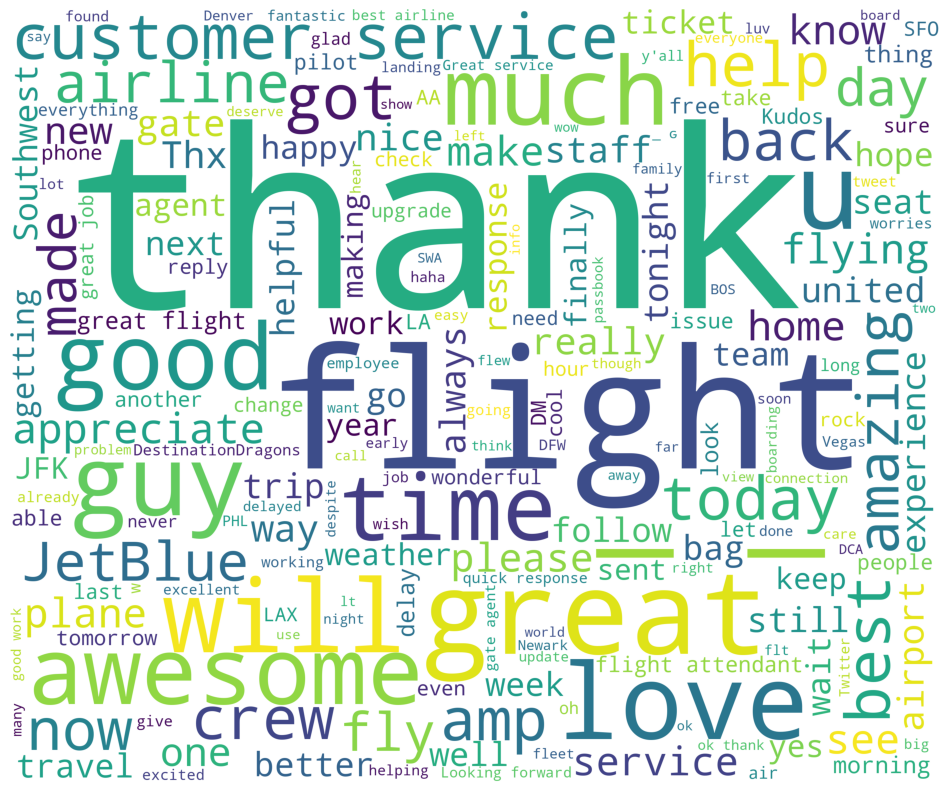

In [ ]:
new_df = df[df["airline_sentiment"] == "positive"]
words = " ".join(new_df["text"])
cleaned_word = " ".join([word for word in words.split() if "http" not in word and not word.startswith("@") and word != "RT"])
wordcloud = WordCloud(stopwords = STOPWORDS,
                     background_color = "white", width = 3000, height = 2500).generate(cleaned_word)
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

- The meaningful words that can be spotted in the positive sentiments’ word cloud directly include “thank”, “best”, “great” and “awesome”, "good".

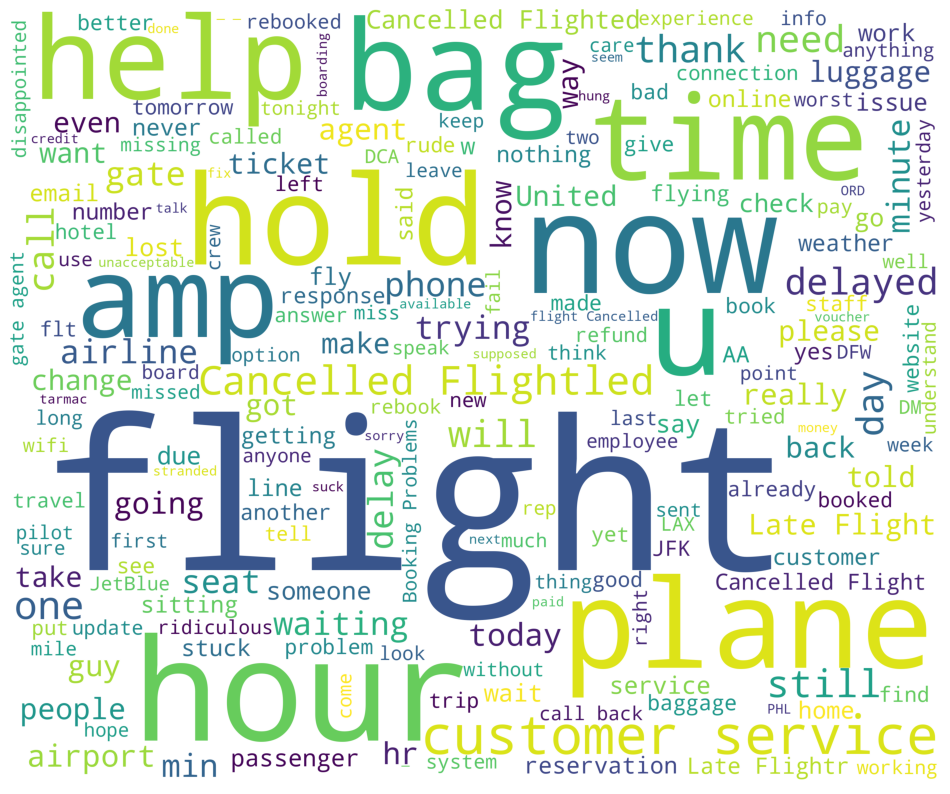

In [ ]:
new_df = df[df["airline_sentiment"] == "negative"]
words = " ".join(new_df["text"])
cleaned_word = " ".join([word for word in words.split() if "http" not in word and not word.startswith("@") and word != "RT"])
wordcloud = WordCloud(stopwords = STOPWORDS,
                     background_color = "white", width = 3000, height = 2500).generate(cleaned_word)
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

- The meaningful words that can be spotted in the negative sentiments’ word cloud directly are “delay”, "customer service" , “cancelLed flight” and"Late Flight" etc.

- Overall, it seems that both word clouds display a lot of non-meaningful words at the same time as well like “PHL”, “help”, “time”, “today”, “will”, "LAX" etc.

In [54]:
# Drop all other columns except text and airline_sentiment
df = df.loc[:, ['text', 'airline_sentiment']]
df.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


### 1.3 Text Preprocessing

The preprocessing and cleaning stages consists of removing the stopwords, removing twitter mentions e.g., @VirginAirlines, removing any links, punctuation, converting the data to lower case, Lematization etc

In [55]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    # Use list comprehension for efficient list creation
    new_text = [word for word in text.split() if word not in stop_words]
    return " ".join(new_text)

# Apply the function to the 'review' column
df['text'] = df['text'].apply(remove_stopwords)

In [56]:
# tokenize the text
df['text'] = df.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)
df.head()

,text,airline_sentiment
0,"[@, VirginAmerica, What, @, dhepburn, said, .]",neutral
1,"[@, VirginAmerica, plus, added, commercials, e...",positive
2,"[@, VirginAmerica, I, today, ..., Must, mean, ...",neutral
3,"[@, VirginAmerica, really, aggressive, blast, ...",negative
4,"[@, VirginAmerica, really, big, bad, thing]",negative


In [57]:
lemmatizer = WordNetLemmatizer()

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words


def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = lemmatize_list(words)
    return ' '.join(words)

df['text'] = df.apply(lambda row: normalize(row['text']), axis=1)
df.head()


,text,airline_sentiment
0,virginamerica what dhepburn say,neutral
1,virginamerica plus add commercials experience ...,positive
2,virginamerica i today must mean i need take an...,neutral
3,virginamerica really aggressive blast obnoxiou...,negative
4,virginamerica really big bad thing,negative


### COUNT VECTORIZATION

In [58]:
# Get the unique values in the 'airline_sentiment' column
sentiments = np.unique(df['airline_sentiment'])

In [23]:
# Count Vectorization
count_vectorizer = CountVectorizer(max_features=1000)
count_features = count_vectorizer.fit_transform(df['text']).toarray()

count_features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [59]:
# Split data into training and testing set
X_count = count_features
y_count = df['airline_sentiment']
X_train_count, X_test_count, y_train_count, y_test_count = train_test_split(X_count, y_count, test_size=0.25, shuffle=False, random_state=42)

In [60]:
# Train the model with Count Vectorization
clf_count = RandomForestClassifier(n_estimators=100, random_state=42)
clf_count.fit(X_train_count, y_train_count)
accuracy_count = clf_count.score(X_test_count, y_test_count)
count_predicted = clf_count.predict(X_test_count)

In [61]:
# Get top features from Count Vectorization
all_features_count = count_vectorizer.get_feature_names_out()
top_features_count = ''
feat_count = clf_count.feature_importances_
top_features_indices_count = np.argsort(feat_count)[::-1][:40]
for i in top_features_indices_count:
    top_features_count += all_features_count[i]
    top_features_count += ', '

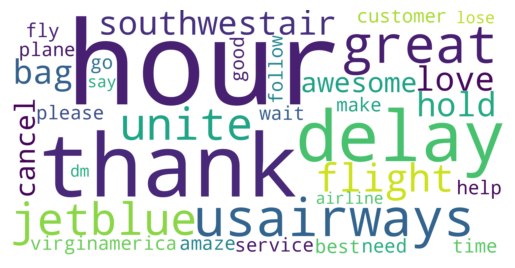

In [ ]:
# Create word cloud for Count Vectorization
wordcloud_count = WordCloud(background_color='white', colormap='viridis', width=2000, height=1000).generate(top_features_count)
plt.imshow(wordcloud_count, interpolation='bilinear')
plt.figure(1, figsize=(15, 12), frameon='equal')
plt.axis('off')
plt.show()

### TF-IDF VECTORIZATION

In [62]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_features = tfidf_vectorizer.fit_transform(df['text']).toarray()


In [63]:
# Split data into training and testing set
X_tfidf = tfidf_features
y_tfidf = df['airline_sentiment']
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, y_tfidf, test_size=0.25, shuffle=False, random_state=42)


In [64]:
# Train the model with TF-IDF Vectorization
clf_tfidf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_tfidf.fit(X_train_tfidf, y_train_tfidf)
accuracy_tfidf = clf_tfidf.score(X_test_tfidf, y_test_tfidf)
tfidf_predicted = clf_tfidf.predict(X_test_tfidf)

In [65]:
# Get top features from TF-IDF Vectorization
all_features_tfidf = tfidf_vectorizer.get_feature_names_out()
top_features_tfidf = ''
feat_tfidf = clf_tfidf.feature_importances_
top_features_indices_tfidf = np.argsort(feat_tfidf)[::-1][:40]
for i in top_features_indices_tfidf:
    top_features_tfidf += all_features_tfidf[i]
    top_features_tfidf += ', '

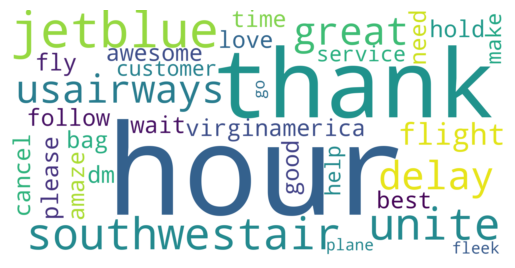

In [ ]:
# Create word cloud for TF-IDF Vectorization
wordcloud_tfidf = WordCloud(background_color='white', colormap='viridis', width=2000, height=1000).generate(top_features_tfidf)
plt.imshow(wordcloud_tfidf, interpolation='bilinear')
plt.figure(1, figsize=(15, 12), frameon='equal')
plt.axis('off')
plt.show()

In [66]:
# Print the accuracy of the models
print('Accuracy with Count Vectorization:', accuracy_count)
print('Accuracy with TF-IDF Vectorization:', accuracy_tfidf)

Accuracy with Count Vectorization: 0.7846994535519126
Accuracy with TF-IDF Vectorization: 0.7871584699453552


In [67]:
from sklearn.decomposition import LatentDirichletAllocation

# Convert preprocessed text to a document-term matrix
vectorizer = CountVectorizer()
dtm = vectorizer.fit_transform(df['text'])

# Perform LDA topic modeling
num_topics = 5  # Specify the number of topics
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(dtm)

# Get the most important words for each topic
feature_names = vectorizer.get_feature_names_out()
top_words = 10  # Specify the number of top words to display for each topic
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic #{topic_idx+1}:")
    print(", ".join([feature_names[i] for i in topic.argsort()[:-top_words - 1:-1]]))
    print()


Topic #1:
americanair, flight, call, usairways, get, jetblue, unite, hours, phone, wait

Topic #2:
jetblue, thank, unite, southwestair, you, http, fly, americanair, airline, great

Topic #3:
flight, usairways, cancel, southwestair, delay, get, unite, hold, flightled, service

Topic #4:
unite, americanair, usairways, flight, seat, virginamerica, bag, get, ticket, check

Topic #5:
unite, americanair, flight, get, nt, ca, usairways, help, make, southwestair



### Modelling

We will proceed to creating some models .We proceeded with the Neural Network and XGBClassifier models after the vectorization steps, we aimed to improve the accuracy of sentiment classification. The vectorization techniques helped capture the relevant information and patterns within the tweets, enabling the models to learn from these representations and make more informed predictions.

### Convolutional Neural Networks model

The Neural Network model is a deep learning-based approach that utilizes multiple layers of interconnected nodes to learn complex relationships within the data. It consists of an input layer, hidden layers, and an output layer. The network learns from the input features and corresponding labels to optimize its weights and biases, ultimately making predictions on unseen data. The Neural Network model used various activation functions and the Adam optimizer to train the model and minimize the categorical cross-entropy loss. It was trained for a specified number of epochs with a batch size of 32.



In [68]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Encode target variable into one-hot encoded vectors
label_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder(sparse=False)

y_train_encoded = label_encoder.fit_transform(y_train_tfidf)
y_train_encoded = onehot_encoder.fit_transform(y_train_encoded.reshape(-1, 1))

y_test_encoded = label_encoder.transform(y_test_tfidf)
y_test_encoded = onehot_encoder.transform(y_test_encoded.reshape(-1, 1))

def evaluate_neural_network(train_features, test_features, train_labels, test_labels):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=train_features.shape[1]))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(train_labels.shape[1], activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(train_features, train_labels, epochs=10, batch_size=32, verbose=0)
    
    pred_prob = model.predict(test_features)
    pred = np.argmax(pred_prob, axis=1)
    accuracy = accuracy_score(np.argmax(test_labels, axis=1), pred)

    print('Accuracy of the neural network is ' + str(accuracy))
    print(classification_report(np.argmax(test_labels, axis=1), pred))
    

evaluate_neural_network(X_train_tfidf, X_test_tfidf, y_train_encoded, y_test_encoded)


115/115 [==============================] - 0s 4ms/step
Accuracy of the neural network is 0.7743169398907104
              precision    recall  f1-score   support

           0       0.88      0.85      0.87      2627
           1       0.46      0.52      0.49       577
           2       0.63      0.65      0.64       456

    accuracy                           0.77      3660
   macro avg       0.66      0.67      0.66      3660
weighted avg       0.78      0.77      0.78      3660




The neural network model achieved an accuracy of 0.774 on the given dataset, indicating that it correctly predicted the sentiment of approximately 77.4% of the tweets. The model's performance varied across the different sentiment classes.

For negative sentiment (class 0), the model demonstrated good precision (0.88), recall (0.85), and F1-score (0.87). This suggests that the model accurately identified the majority of negative tweets and had a low number of false positives.

However, for neutral sentiment (class 1), the model's performance was relatively lower. The precision (0.46) and recall (0.52) were both below average, indicating that the model struggled to correctly classify neutral tweets. The F1-score for this class was 0.49, reflecting a moderate overall performance.

Regarding positive sentiment (class 2), the model achieved a precision of 0.63 and a recall of 0.65. The F1-score for this class was 0.64, indicating a relatively balanced performance in identifying positive tweets.

The macro average, which considers the performance across all classes, yielded precision, recall, and F1-score values of 0.66. This indicates a moderately balanced overall performance.

The weighted average, which takes into account the class imbalance, resulted in higher precision, recall, and F1-score values of 0.78. This suggests that the model performed well, considering the distribution of sentiment classes in the dataset.

In conclusion, the neural network model exhibited reasonably good accuracy on the given dataset, with better performance for negative and positive sentiments compared to neutral sentiment. Further analysis and potential improvements are recommended to enhance the model's performance for neutral sentiment classification.

#### XG Boost Model

XGBClassifier model is based on gradient boosting, an ensemble technique that combines multiple weak predictive models, known as decision trees, to create a strong predictive model. XGBoost stands for "Extreme Gradient Boosting," which optimizes the gradient boosting algorithm to enhance model performance. The XGBClassifier model iteratively builds decision trees, minimizing the loss function through gradient descent. It utilizes a variety of hyperparameters and gradient boosting-specific techniques to improve accuracy and control overfitting.

In [69]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder

# Encode target variable into numeric values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_tfidf)
y_test_encoded = label_encoder.transform(y_test_tfidf)

def evaluate_classifiers(train_features, test_features, train_labels, test_labels, classifiers):
    Accuracy = []
    Model = []

    for classifier in classifiers:
        try:
            model = Sequential()
            model.add(Dense(64, activation='relu', input_dim=train_features.shape[1]))
            model.add(Dense(32, activation='relu'))
            model.add(Dense(3, activation='softmax'))
            model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
            model.fit(train_features, train_labels, epochs=10, batch_size=32, verbose=0)
            pred = model.predict_classes(test_features)
        except Exception:
            clf = classifier.fit(train_features, train_labels)
            pred = clf.predict(test_features)

        accuracy = accuracy_score(pred, test_labels)
        Accuracy.append(accuracy)
        Model.append(classifier.__class__.__name__)
        print('Accuracy of ' + classifier.__class__.__name__ + ' is ' + str(accuracy))
        print(classification_report(pred, test_labels))
        

classifiers = [
    XGBClassifier(),
]

evaluate_classifiers(X_train_tfidf, X_test_tfidf, y_train_encoded, y_test_encoded, classifiers)


Accuracy of XGBClassifier is 0.7980874316939891
              precision    recall  f1-score   support

           0       0.93      0.83      0.88      2935
           1       0.31      0.56      0.40       324
           2       0.64      0.73      0.69       401

    accuracy                           0.80      3660
   macro avg       0.63      0.71      0.66      3660
weighted avg       0.85      0.80      0.82      3660



The XGBClassifier model achieved an accuracy of 0.80 on the given dataset, indicating that it correctly predicted the sentiment of approximately 79.8% of the tweets. The model's performance varied across the different sentiment classes.

For negative sentiment (class 0), the model demonstrated high precision (0.93) and recall (0.83), indicating that it accurately identified the majority of negative tweets. The F1-score for this class was 0.88, reflecting a balanced performance.

For neutral sentiment (class 1), the model's performance was relatively lower. The precision (0.31) and recall (0.56) were both below average, indicating that the model struggled to correctly classify neutral tweets. The F1-score for this class was 0.40, suggesting room for improvement.

Regarding positive sentiment (class 2), the model achieved a precision of 0.64 and a recall of 0.73. The F1-score for this class was 0.69, indicating a relatively balanced performance in identifying positive tweets.

The macro average, which considers the performance across all classes, yielded precision, recall, and F1-score values of 0.63, 0.71, and 0.66, respectively. This suggests a moderate overall performance across the sentiment classes.

The weighted average, which takes into account the class imbalance, resulted in higher precision, recall, and F1-score values of 0.85, 0.80, and 0.82, respectively. This indicates that the model performed well, considering the distribution of sentiment classes in the dataset.

In conclusion, the XGBClassifier model demonstrated the best accuracy on the given dataset, with particularly strong performance for negative sentiment. 